In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from scipy.cluster import hierarchy

%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv', sep=',')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
len(df['EDUCATION'].unique())

7

In [6]:
df.drop('ID', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [8]:
level = []
count = []

for i in range(7):
    level.append(i)
    count.append(np.sum(df['EDUCATION'] == i))

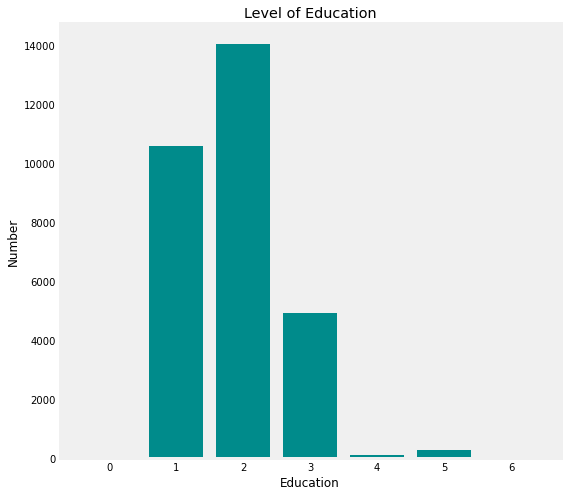

In [9]:
fig = plt.figure(figsize=(8,8))
plt.bar(level, count, color='darkcyan')
plt.title('Level of Education')
plt.xlabel('Education')
plt.ylabel('Number')
plt.grid(False)
plt.show()

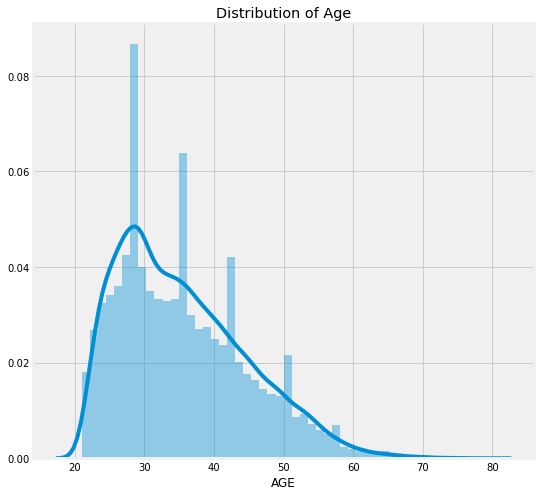

In [10]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df['AGE'])
plt.title('Distribution of Age')
plt.show()

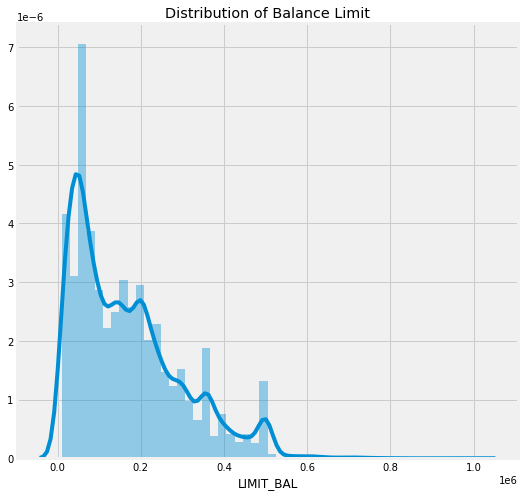

In [11]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df['LIMIT_BAL'])
plt.title('Distribution of Balance Limit')
plt.show()

In [12]:
edu_level = df['EDUCATION']
edu_level

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

In [13]:
X = df.drop('EDUCATION', axis=1)
X.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,26,-1,2,0,0,0,2,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,34,0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,37,0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,1,57,-1,0,-1,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
feature_cols = X.columns
feature_cols

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [15]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
X = pd.DataFrame(X, columns=feature_cols)
X.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.010101,1.0,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


In [16]:
km_list = []

for clust in range(1, 15):
    km = KMeans(n_clusters = clust, random_state=42)
    km = km.fit(X)
    km_list.append(pd.Series({'clusters':clust, 'inertia':km.inertia_, 'model':km}))

In [17]:
km_list

[clusters                                                    1
 inertia                                               17666.2
 model       KMeans(algorithm='auto', copy_x=True, init='k-...
 dtype: object,
 clusters                                                    2
 inertia                                               10464.2
 model       KMeans(algorithm='auto', copy_x=True, init='k-...
 dtype: object,
 clusters                                                    3
 inertia                                               6784.43
 model       KMeans(algorithm='auto', copy_x=True, init='k-...
 dtype: object,
 clusters                                                    4
 inertia                                               5150.59
 model       KMeans(algorithm='auto', copy_x=True, init='k-...
 dtype: object,
 clusters                                                    5
 inertia                                               4671.23
 model       KMeans(algorithm='auto', copy_x=True, ini

In [26]:
pickle.dump(km_list, open('km_list.pkl', 'wb'))

In [18]:
clusters =[]
inertia = []

for i in range(len(km_list)):
    clusters.append(km_list[i][0])
    inertia.append(km_list[i][1])

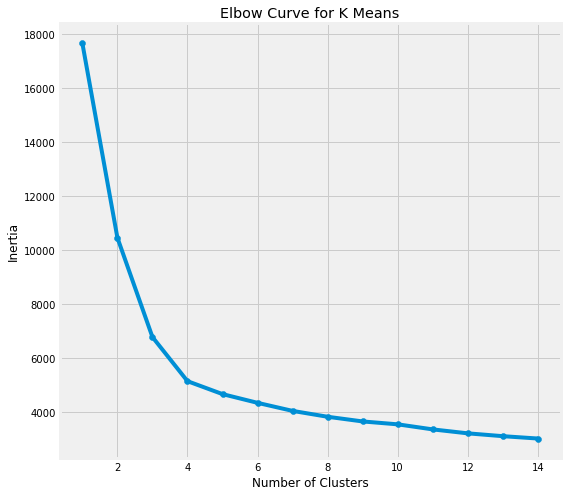

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(clusters, inertia)
plt.scatter(clusters, inertia, marker='o')
plt.title('Elbow Curve for K Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7 = kmeans7.fit(X)
print('Inertia:', kmeans7.inertia_)

Inertia: 4049.7267663828216


In [27]:
pickle.dump(kmeans7, open('kmeans7.pkl', 'wb'))

In [21]:
X['kmeans'] = kmeans7.predict(X)

In [22]:
agg = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
agg = agg.fit(X)

In [28]:
pickle.dump(agg, open('agg.pkl', 'wb'))

In [45]:
X['agg'] = agg.fit_predict(X)

Text(0.5, 1.0, 'Dendrogram for Ward Distance')

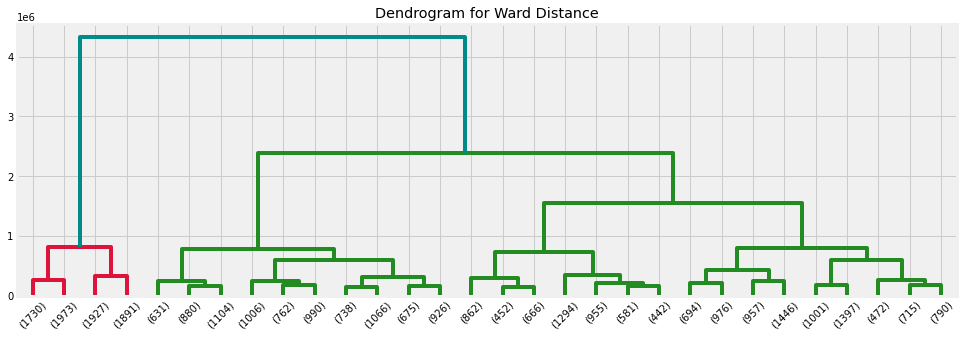

In [38]:
Z = hierarchy.linkage(agg.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

hierarchy.set_link_color_palette(['crimson', 'forestgreen'])

den = hierarchy.dendrogram(Z, orientation='top', p=30, truncate_mode='lastp', show_leaf_counts=True,
                         ax=ax, above_threshold_color='darkcyan')

plt.title('Dendrogram for Ward Distance')

In [34]:
agg_manhattan = AgglomerativeClustering(n_clusters=7, affinity='manhattan', linkage='average')
agg_manhattan = agg_manhattan.fit(X)

In [35]:
pickle.dump(agg_manhattan, open('agg_manhattan.pkl', 'wb'))

In [36]:
X['agg_manhattan'] = agg_manhattan.fit_predict(X)

Text(0.5, 1.0, 'Dendrogram for Manhattan Distance')

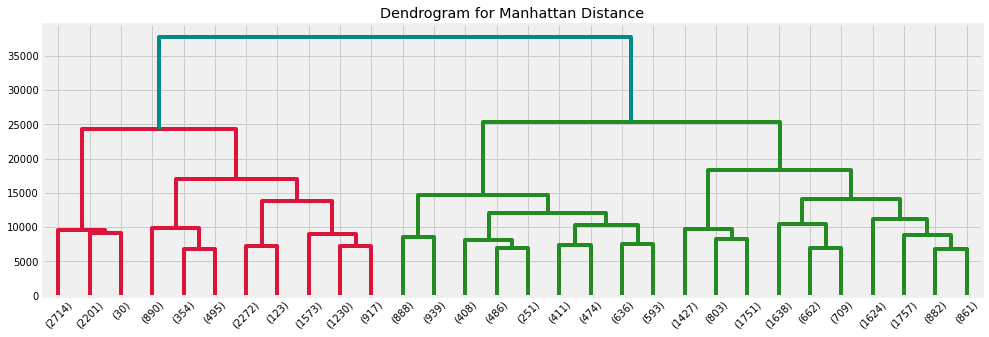

In [37]:
Z = hierarchy.linkage(agg_manhattan.children_, method='average')

fig, ax = plt.subplots(figsize=(15,5))

hierarchy.set_link_color_palette(['crimson', 'forestgreen'])

den = hierarchy.dendrogram(Z, orientation='top', p=30, truncate_mode='lastp', show_leaf_counts=True,
                         ax=ax, above_threshold_color='darkcyan')

plt.title('Dendrogram for Manhattan Distance')

In [40]:
db = DBSCAN(eps=3, min_samples=2)
db.fit(X)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [41]:
clusters = db.labels_

In [43]:
X['db'] = clusters

In [47]:
cluster_summary = pd.concat([edu_level, X[['kmeans', 'agg', 'agg_manhattan', 'db']]], axis=1)

In [67]:
cluster_summary.head(10)

,EDUCATION,kmeans,agg,agg_manhattan,db
0,2,2,0,0,0
1,2,2,0,0,0
2,2,1,6,2,1
3,2,4,5,4,2
4,2,6,4,1,0
5,1,0,3,2,1
6,1,0,3,2,1
7,2,1,6,2,1
8,3,4,5,4,2
9,3,0,3,2,1


In [69]:
import dataframe_image as dfi

dfi.export(cluster_summary.head(10), 'cluster_summary.png')

In [66]:
km_count = 0
agg_count = 0
agg_manhattan_count = 0
db_count = 0

for i in range(len(cluster_summary)):
    if cluster_summary.iloc[i][0] == cluster_summary.iloc[i][1]:
        km_count += 1
    elif cluster_summary.iloc[i][0] == cluster_summary.iloc[i][2]:
        agg_count += 1
    elif cluster_summary.iloc[i][0] == cluster_summary.iloc[i][3]:
        agg_manhattan_count += 1
    elif cluster_summary.iloc[i][0] == cluster_summary.iloc[i][4]:
        db_count += 1

km_percent = round(km_count/len(cluster_summary)*100, 2)
agg_percent = round(agg_count/len(cluster_summary)*100, 2)    
agg_manhattan_percent = round(agg_manhattan_count/len(cluster_summary)*100, 2)
db_percent = round(db_count/len(cluster_summary)*100, 2)
    
print('Percentages Correct for Models')
print('------------------------------')
print('KMeans:', km_percent)
print('Agglomerative (Euclidean):', agg_percent)
print('Agglomerative (Manhattan):', agg_manhattan_percent)
print('DBSCAN:', db_percent)

Percentages Correct for Models
------------------------------
KMeans: 16.52
Agglomerative (Euclidean): 13.47
Agglomerative (Manhattan): 20.77
DBSCAN: 15.31
